Saving 10. Market Basket Analysis.csv to 10. Market Basket Analysis (7).csv
✅ Loaded Aisle Data


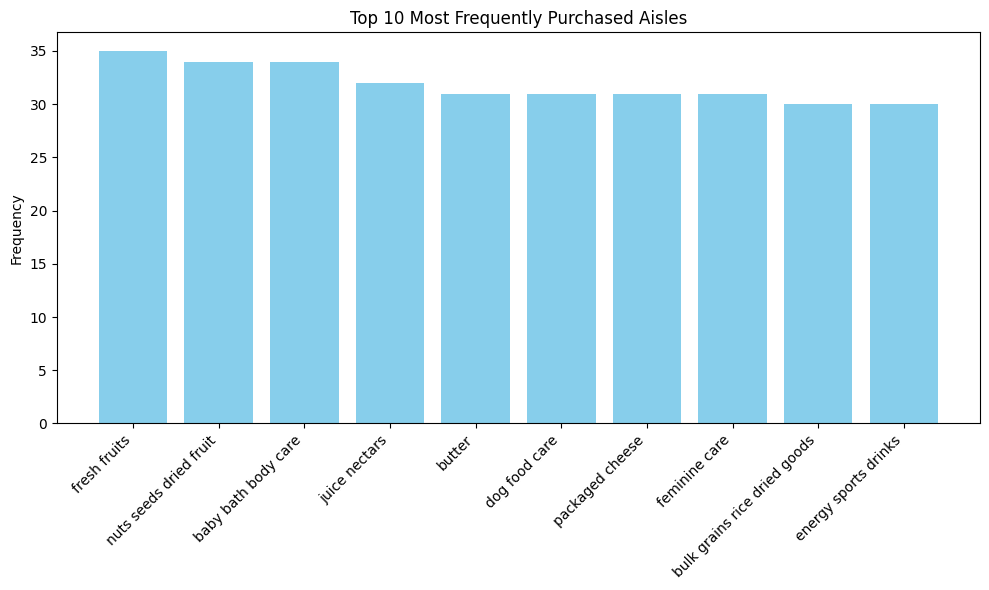


Top 10 Most Common Aisles:

                          Aisle  Frequency
0                  fresh fruits         35
1        nuts seeds dried fruit         34
2           baby bath body care         34
3                 juice nectars         32
4                        butter         31
5                 dog food care         31
6               packaged cheese         31
7                 feminine care         31
8  bulk grains rice dried goods         30
9          energy sports drinks         30

🛍️ Top 10 Frequently Bought Together Pairs:

energy sports drinks + frozen produce: 4 times
deodorants + hot cereal pancake mixes: 4 times
cookies cakes + frozen breads doughs: 4 times
frozen breakfast + packaged vegetables fruits: 4 times
fresh fruits + skin care: 3 times
frozen dessert + grains rice dried goods: 3 times
frozen dessert + juice nectars: 3 times
canned meals beans + granola: 3 times
body lotions soap + prepared meals: 3 times
dog food care + lunch meat: 3 times


In [10]:
# 📁 1. Upload the aisle dataset
from google.colab import files
uploaded = files.upload()

# 🧼 2. Load the uploaded CSV
import pandas as pd

# Replace with your uploaded file name
file_name = list(uploaded.keys())[0]
aisle_data = pd.read_csv(file_name)
aisle_list = aisle_data['aisle'].tolist()
print("✅ Loaded Aisle Data")
aisle_data.head()

# 🎲 3. Simulate 1000 random transactions
import random
random.seed(42)

transactions = []
for _ in range(1000):
    n_items = random.randint(1, 5)  # number of items per basket
    basket = random.sample(aisle_list, n_items)
    transactions.append(basket)

transactions_df = pd.DataFrame({'Transaction': range(1, 1001), 'Items': transactions})
transactions_df.head()

# 📊 4. Market Basket Frequency Analysis
from collections import Counter

all_items = [item for sublist in transactions for item in sublist]
item_counts = Counter(all_items)
top_10_items = item_counts.most_common(10)

# 📈 5. Plot Bar Graph of Top 10 Items
import matplotlib.pyplot as plt

items, counts = zip(*top_10_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='skyblue')
plt.title('Top 10 Most Frequently Purchased Aisles')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📋 6. Show Top 10 Items
top_10_df = pd.DataFrame(top_10_items, columns=["Aisle", "Frequency"])
print("\nTop 10 Most Common Aisles:\n")
print(top_10_df)

# 🔁 7. Frequently Bought Together (Pair Co-occurrence)
from itertools import combinations, chain

pair_counts = Counter()

# Count all item pairs per transaction
for basket in transactions:
    for pair in combinations(sorted(basket), 2):
        pair_counts[pair] += 1

# Get the top 10 most frequent item pairs
top_10_pairs = pair_counts.most_common(10)

# Display results
print("\n🛍️ Top 10 Frequently Bought Together Pairs:\n")
for pair, count in top_10_pairs:
    print(f"{pair[0]} + {pair[1]}: {count} times")

# Optional: convert to DataFrame
pair_df = pd.DataFrame(top_10_pairs, columns=["Item Pair", "Frequency"])
pair_df["Item Pair"] = pair_df["Item Pair"].apply(lambda x: f"{x[0]} + {x[1]}")

